<a href="https://colab.research.google.com/github/soyebganja/DL-Practice-Projects/blob/main/7%3ANeural%20Networks%20in%20PyTorch/7_4_Classification_Report_and_Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms

import matplotlib.pyplot as plt
import torch.optim as optim
import seaborn as sns

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=transform
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 477kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.42MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.37MB/s]


In [3]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [4]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

data_iter = iter(train_loader)
images, labels = next(data_iter)

In [5]:
images.shape

torch.Size([64, 1, 28, 28])

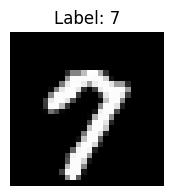

In [8]:
plt.figure(figsize=(2, 2))
plt.imshow(images[5].squeeze(), cmap='gray')
plt.title(f'Label: {labels[5]}')
plt.axis('off')
plt.show()


In [9]:
class DigitsClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
    def forward(self, x):
        return self.network(x)

In [10]:
model = DigitsClassifier()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [11]:
epochs = 5

for epoch in range(epochs):
  for images, labels in train_loader:
    # 1. Forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)
    # 2. Backward pass
    optimizer.zero_grad()
    loss.backward()

    # 3. Update weights
    optimizer.step()

  print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [1/5], Loss: 0.2890
Epoch [2/5], Loss: 0.1517
Epoch [3/5], Loss: 0.0761
Epoch [4/5], Loss: 0.1282
Epoch [5/5], Loss: 0.0354


In [12]:
model.eval()

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Test Accuracy: {100 * correct / total}%')

Test Accuracy: 95.9%


In [13]:
total, correct

(10000, 9590)

### Clasification Report and Confusion Matrix

In [17]:
model.eval()

all_predicted = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        all_predicted.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

In [18]:
len(all_predicted), len(all_labels)

(10000, 10000)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(all_labels, all_predicted, target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
print(report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.94      0.98      0.96      1032
           3       0.92      0.98      0.95      1010
           4       0.97      0.95      0.96       982
           5       0.97      0.93      0.95       892
           6       0.99      0.91      0.95       958
           7       0.97      0.96      0.97      1028
           8       0.92      0.98      0.94       974
           9       0.95      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [20]:
cm = confusion_matrix(all_labels, all_predicted)
print(cm)

[[ 950    0    9    4    3    1    0    4    4    5]
 [   0 1121    6    1    0    0    0    0    7    0]
 [   2    1 1009    6    3    0    0    8    3    0]
 [   0    1    7  986    0    3    0    4    7    2]
 [   0    4    3    1  929    1    3    2    5   34]
 [   3    3    0   34    0  833    2    0   14    3]
 [   4    3   17    1   18   17  869    0   29    0]
 [   0   12   11    7    0    0    0  990    3    5]
 [   2    0    7    7    2    2    1    2  951    0]
 [   1    6    0   19    7    0    1    7   16  952]]


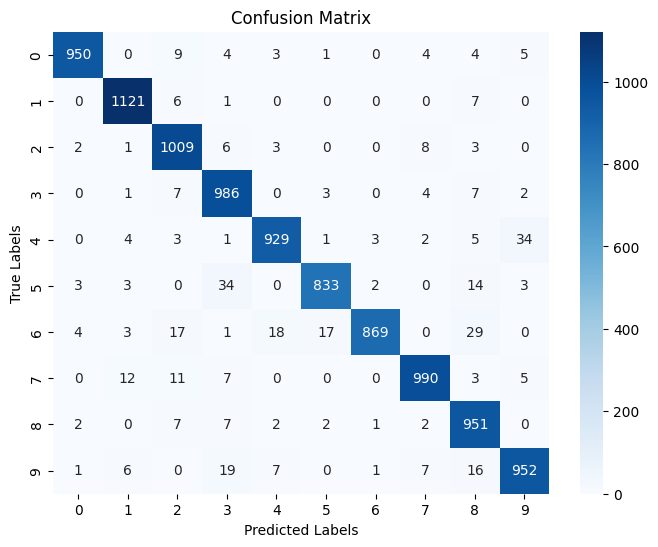

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()